In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
x_data = np.linspace(1, 2, 30)
w=0.2
def model(x_data, theta):
    y_data = 2*(theta) ** w * x_data + theta ** 1 +3
    #y_data = np.log(theta) * x_data
    #y_data = 
    #y_data = np.cos(theta**2) * x_data
    return y_data

In [89]:
def model_d1(x_data, theta):
    #y_data =  (1/(theta)) * x_data
    y_data = 2*w* theta ** (w-1) * x_data + 1
    return y_data

In [90]:
def model_d2(x_data, theta):
    #y_data = - (1/(theta)**2) * x_data
    y_data =2* w * (w-1) * theta ** (w-2) * x_data 
    return y_data

In [91]:
sigma_data = 5
theta_fiducial = 20
model_fiducial = model(x_data, theta_fiducial)

In [92]:
model_fiducial/sigma_data

array([5.32822568, 5.35333691, 5.37844814, 5.40355937, 5.4286706 ,
       5.45378183, 5.47889306, 5.50400429, 5.52911552, 5.55422675,
       5.57933799, 5.60444922, 5.62956045, 5.65467168, 5.67978291,
       5.70489414, 5.73000537, 5.7551166 , 5.78022783, 5.80533906,
       5.83045029, 5.85556152, 5.88067275, 5.90578398, 5.93089521,
       5.95600644, 5.98111767, 6.0062289 , 6.03134013, 6.05645136])

In [93]:
def posterior(theta, y_data):
    return np.prod(np.exp(-(model(x_data, theta) - y_data)**2/(2*sigma_data**2)))

In [94]:
theta_ax = np.linspace(3, 50, 300)
posterior_tab = np.array([posterior(t, model_fiducial) for t in theta_ax])

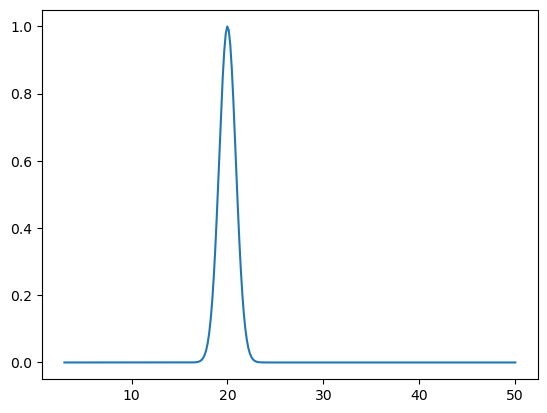

In [95]:
plt.plot(theta_ax, posterior_tab)

In [96]:
n = 3000
mean = []
variance = []
dt = theta_ax[1] - theta_ax[0]
for i in range(n):
    y_datas = model_fiducial + sigma_data*np.random.randn(len(x_data))
    posterior_tab = np.array([posterior(t, y_datas) for t in theta_ax])
    mean_i = np.trapz(posterior_tab*theta_ax, theta_ax)/np.trapz(posterior_tab, theta_ax)
    mean.append(mean_i)
    mean_i2 = np.trapz(posterior_tab*theta_ax**2, theta_ax)/np.trapz(posterior_tab, theta_ax)
    variance.append(mean_i2 - mean_i**2)

In [97]:
var_ind = np.mean(variance)

In [98]:
deriv= model_d1(x_data, theta_fiducial)
Var_data = (np.zeros(len(x_data))+1)*sigma_data**2
var_pred = np.sum(Var_data**(-1) * deriv ** 2)**(-1)

In [99]:
var_pred

0.749174809547303

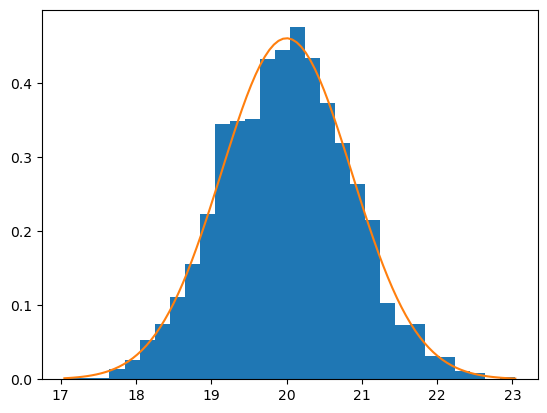

In [100]:
plt.hist(mean, density = True, bins=30)
x = np.linspace(min(mean), max(mean), 100)
dx = x[1]-x[0]
y_pred=np.exp(-.5*(var_pred**(-1))*(x-theta_fiducial)**2)
norm = np.sum(y_pred*dx)
plt.plot(x, y_pred/norm)

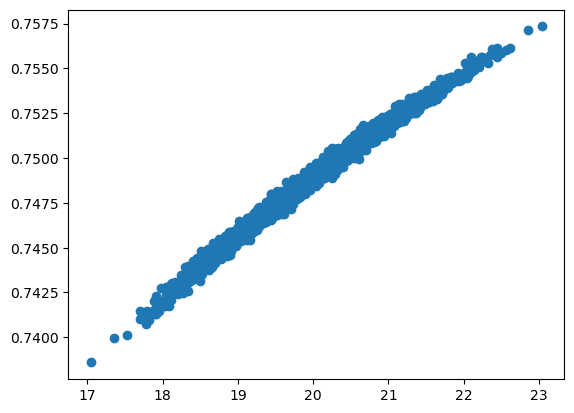

In [101]:
plt.scatter(mean, variance)

In [102]:
deriv2= model_d2(x_data, theta_fiducial)
var_var_pred =     4 * var_pred ** 4 * np.sum( Var_data**(-1) * deriv2 ** 2)

In [103]:
var_pred ** 4 * np.sum(var_pred ** 4 * Var_data**(-2) * deriv** 2)/2

0.002649184213830901

In [104]:
var_var_pred

7.502586910611633e-06

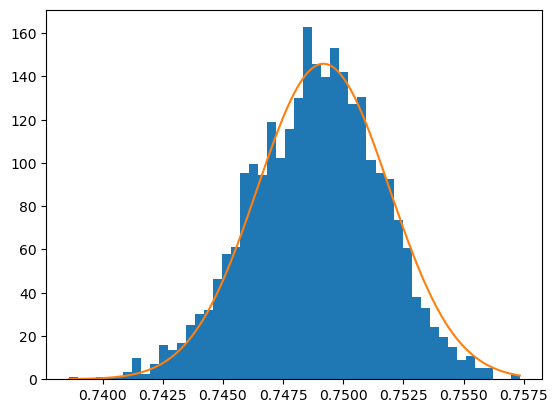

In [105]:
plt.hist(np.array(variance), density=True, bins=50)
x = np.linspace(min(variance), max(variance), 300)
dx = x[1]-x[0]
y_pred=np.exp(-(x-var_pred)**2/(2*var_var_pred))
norm = np.sum(y_pred * dx)
plt.plot(x, y_pred/norm)